# MAP565 Project on time series

## Study of GARCH models

In [1]:
import utils.functions as f
from datetime import datetime
import numpy as np

START_DATE = datetime(2021, 1, 1) 
END_DATE = datetime(2023, 4, 1)
MID_DATE = datetime(2022, 6, 1)

## Leaders in quantum computing

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
All data downloaded : True


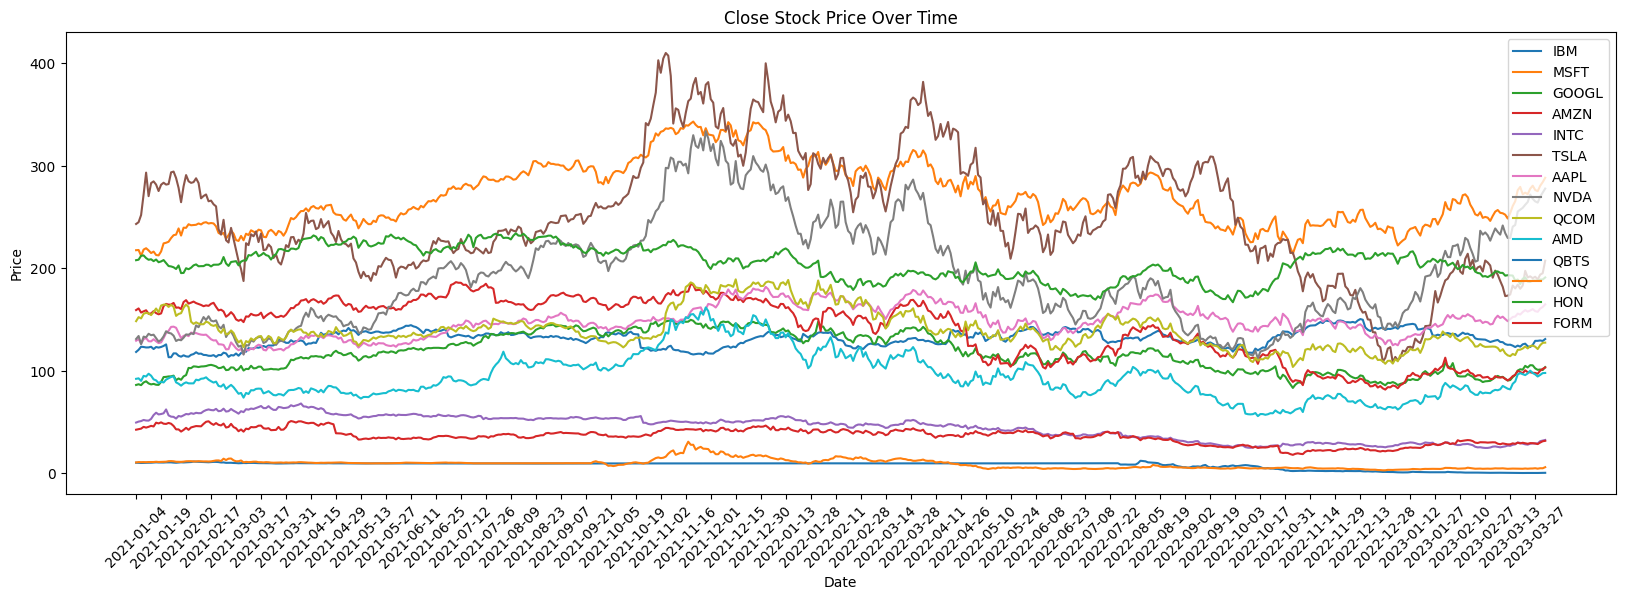

In [2]:
leaders_quantum_computing = ['IBM', 'MSFT', 'GOOGL', 'AMZN', 'INTC', 'TSLA', 'AAPL', 'NVDA', 'QCOM', 'AMD', 'QBTS', 'IONQ', 'HON', 'FORM']

dict_stock_data = {}
for stock in leaders_quantum_computing : 
    dict_stock_data[stock] = f.get_stock_data(stock, START_DATE, END_DATE)

print(f"All data downloaded : {dict_stock_data.__len__() == len(leaders_quantum_computing)}")
f.plot_multiple_stock_data(dict_stock_data)

## Analyse des returns

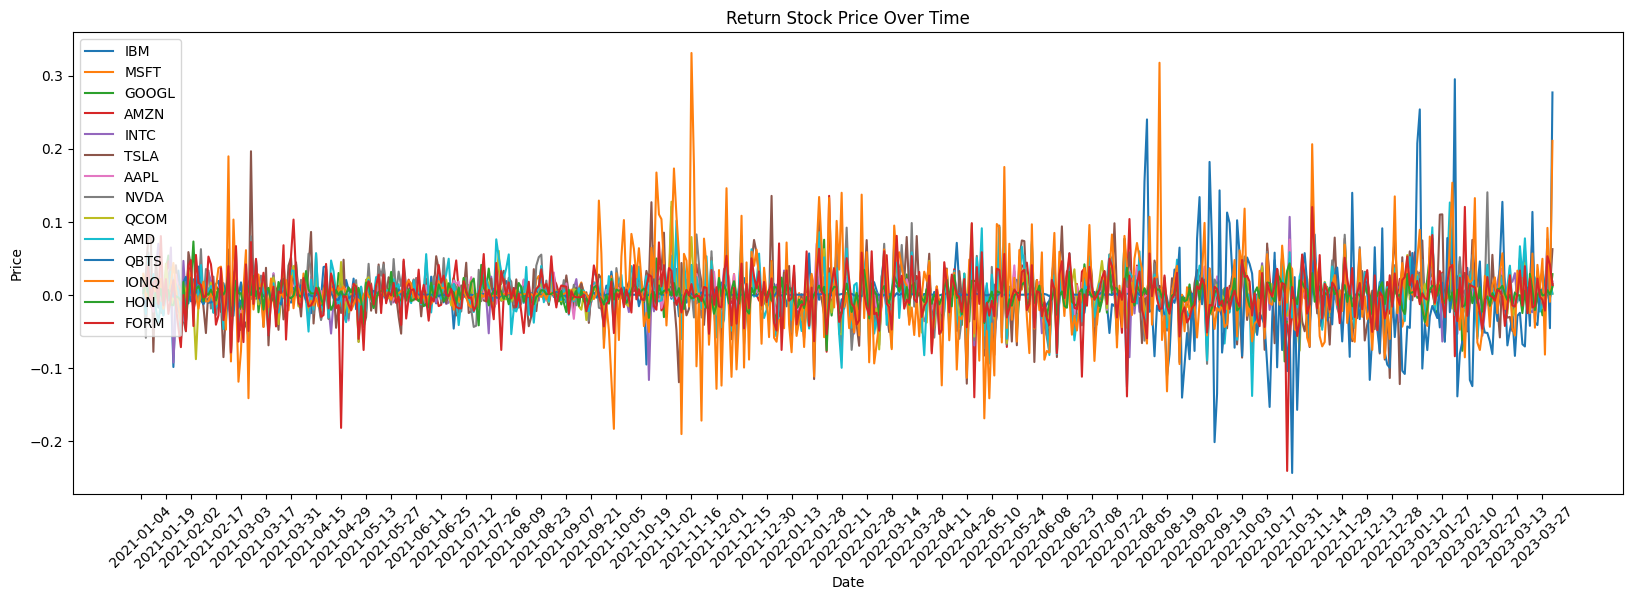

In [3]:
# 1. Compute the returns of the stocks
dict_stock_returns = {}
for stock in leaders_quantum_computing:
    dict_stock_returns[stock] = f.compute_stock_returns(dict_stock_data[stock])

# 2. Plot the returns of the stocks
f.plot_multiple_stock_data(dict_stock_returns, column='return')

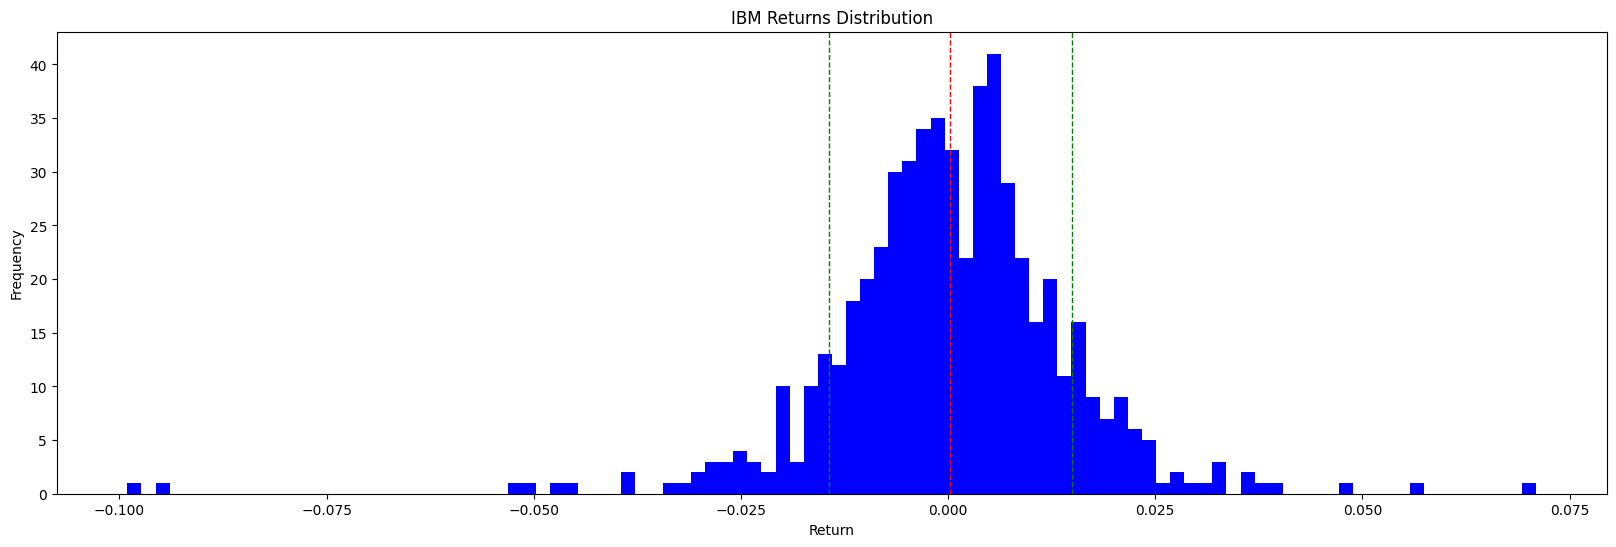

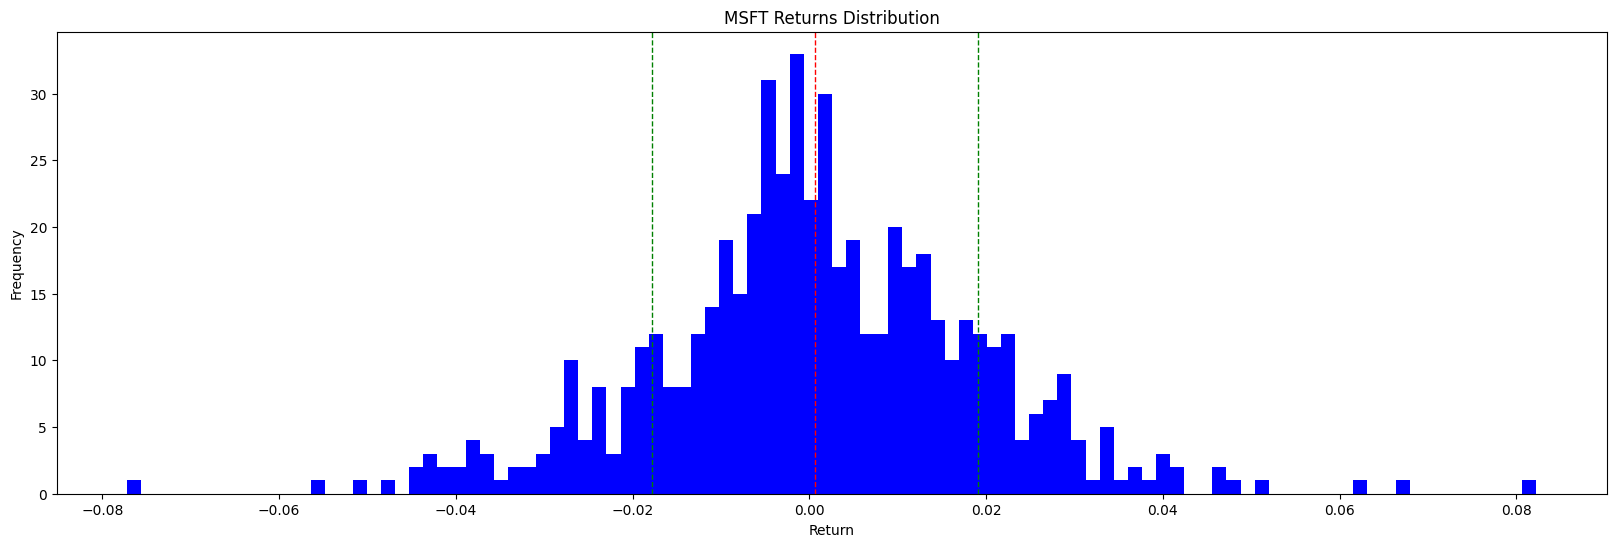

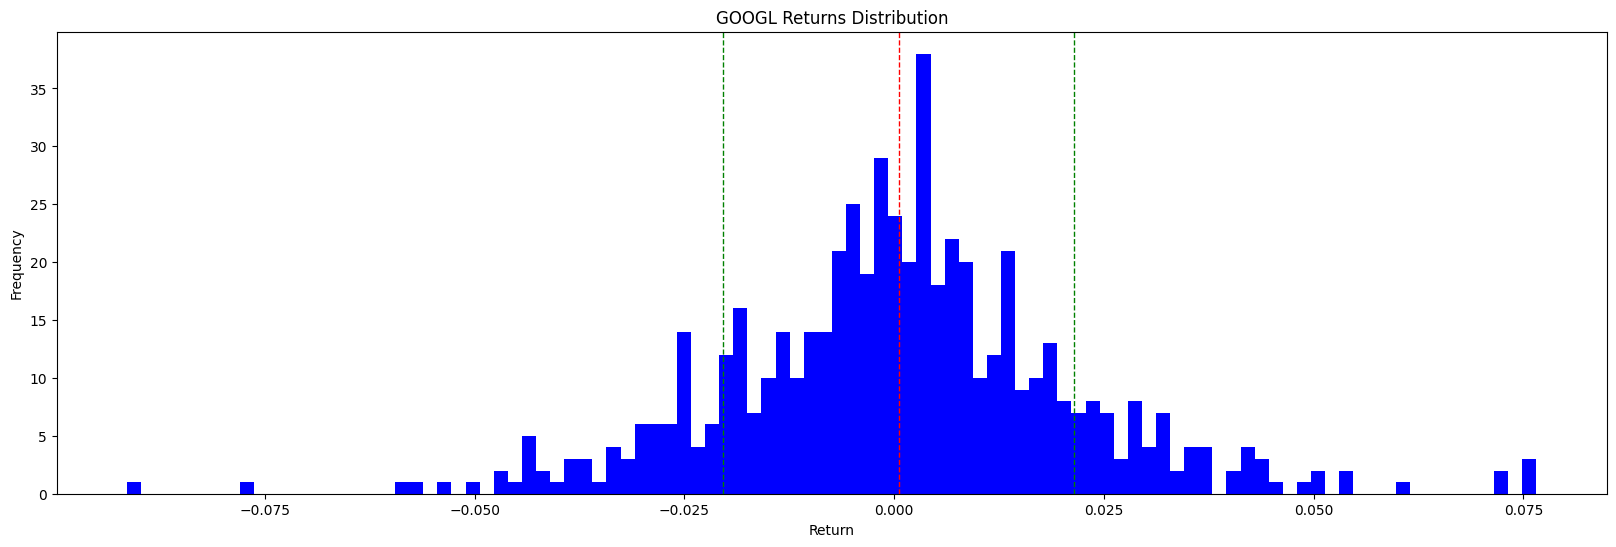

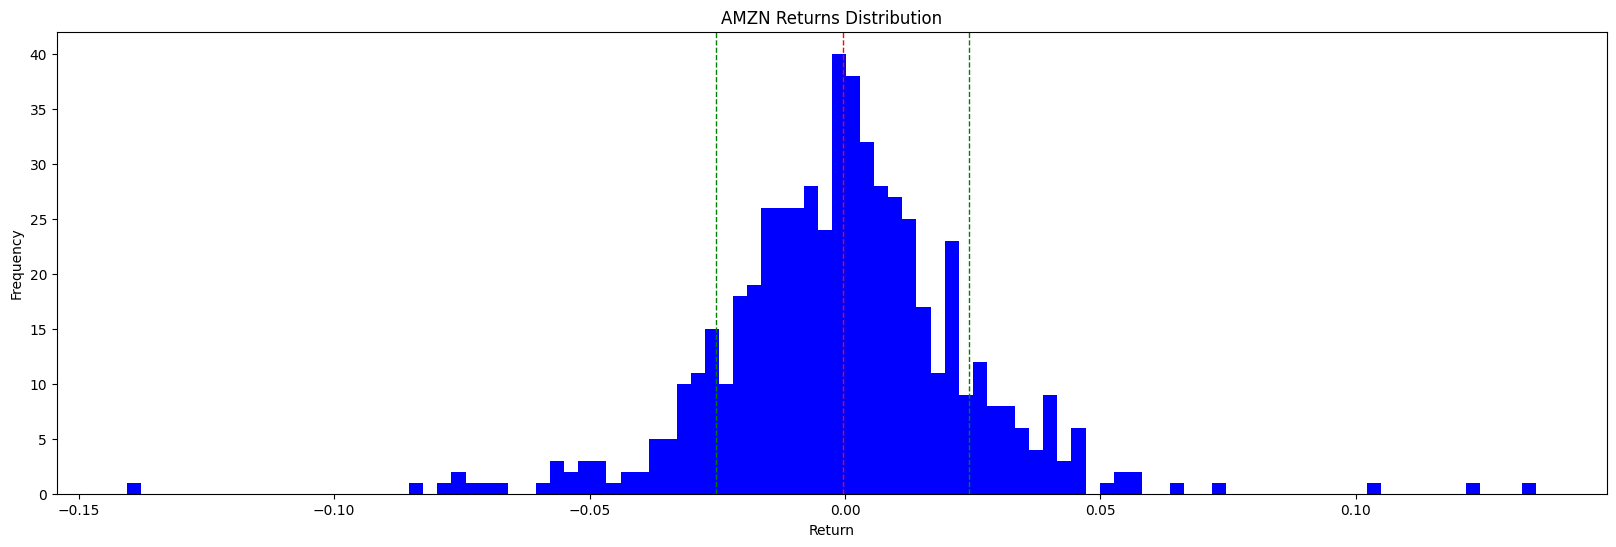

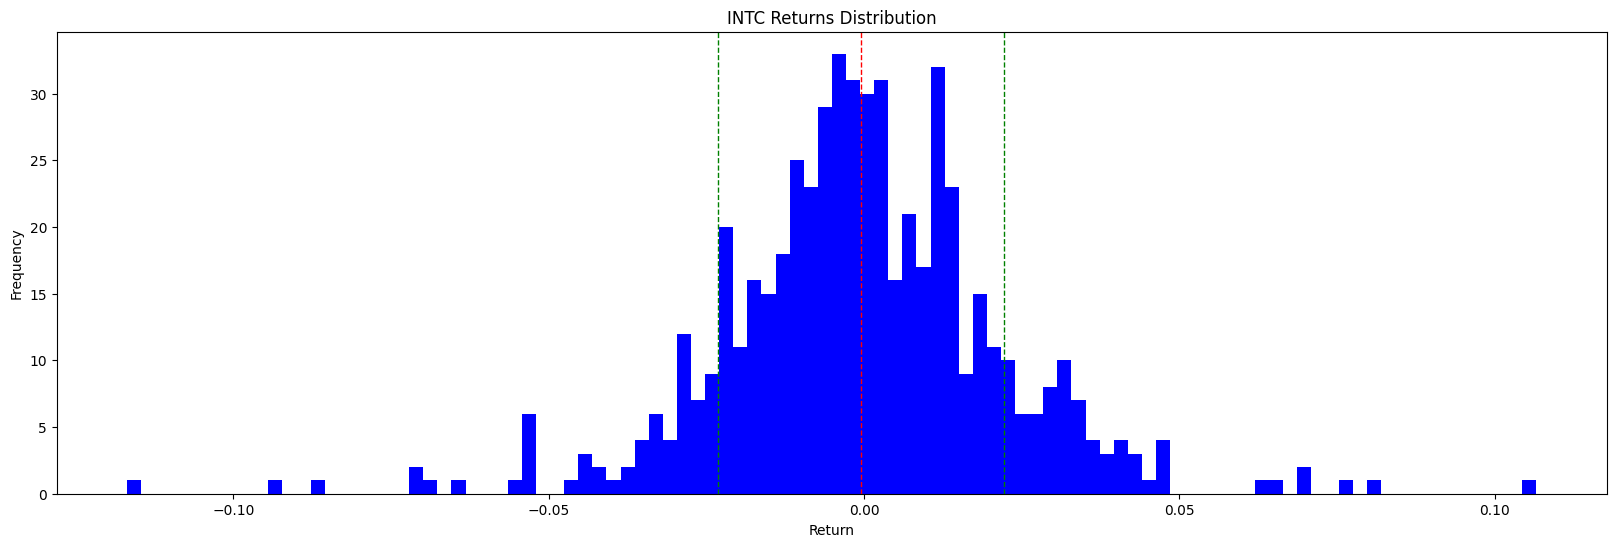

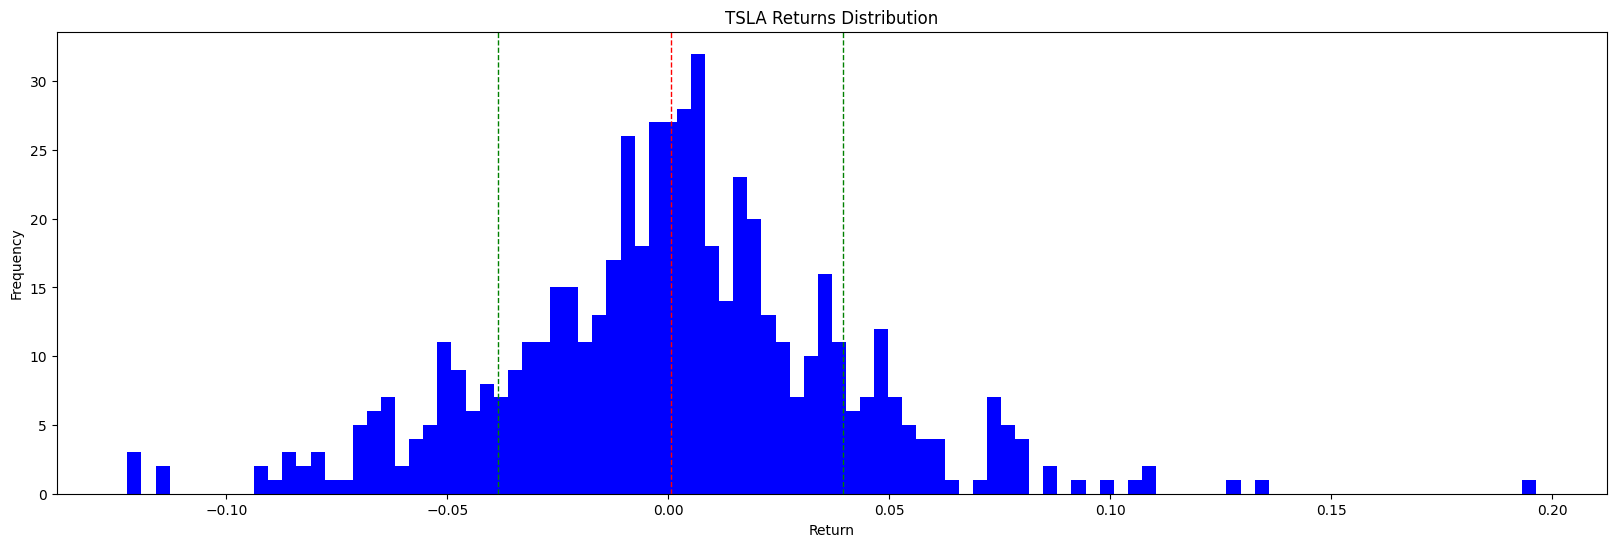

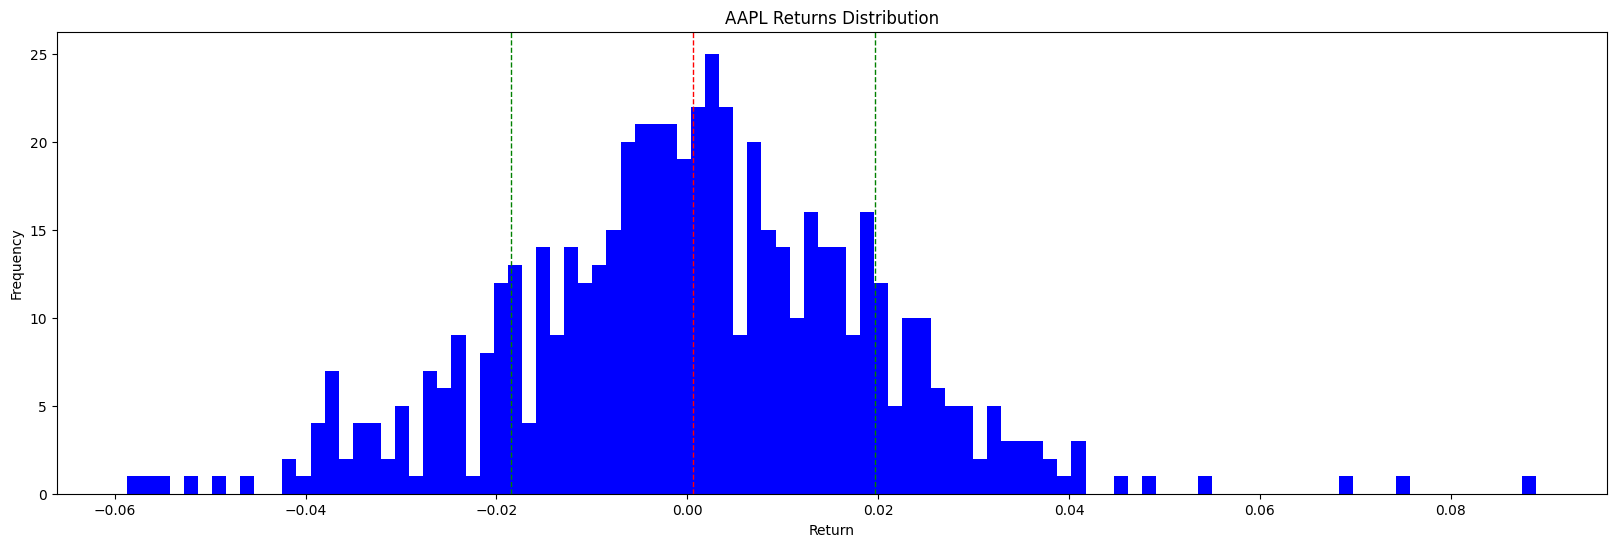

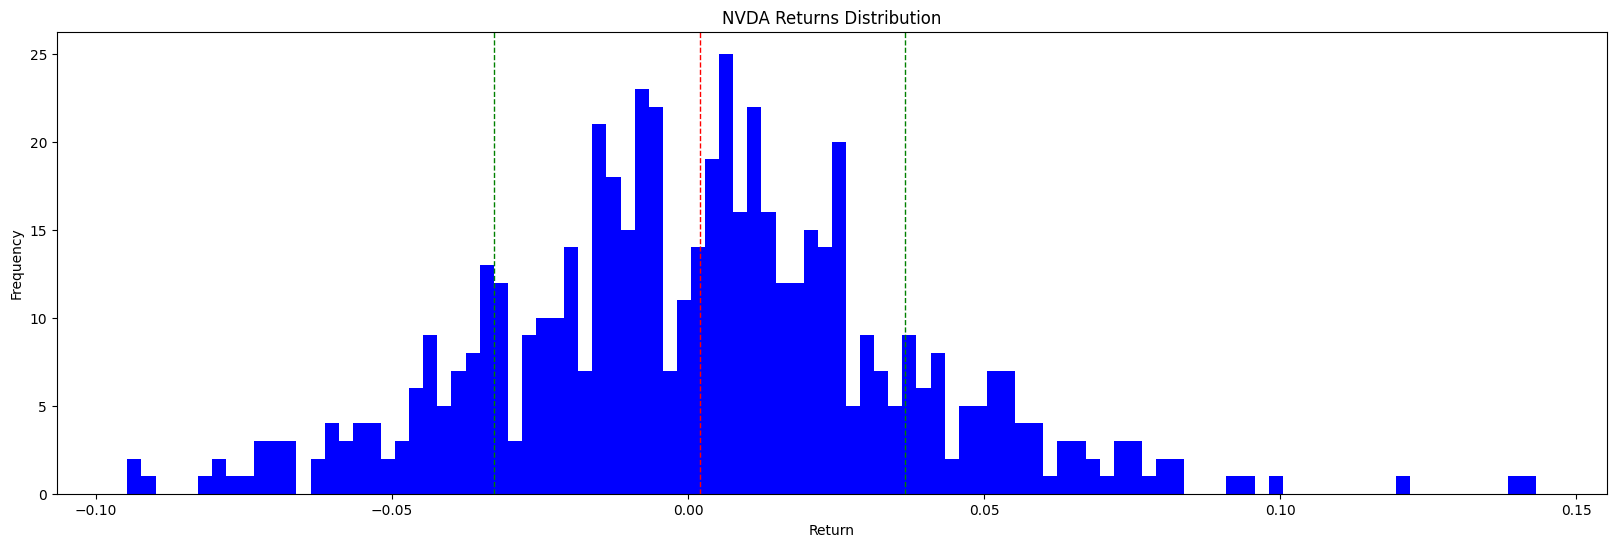

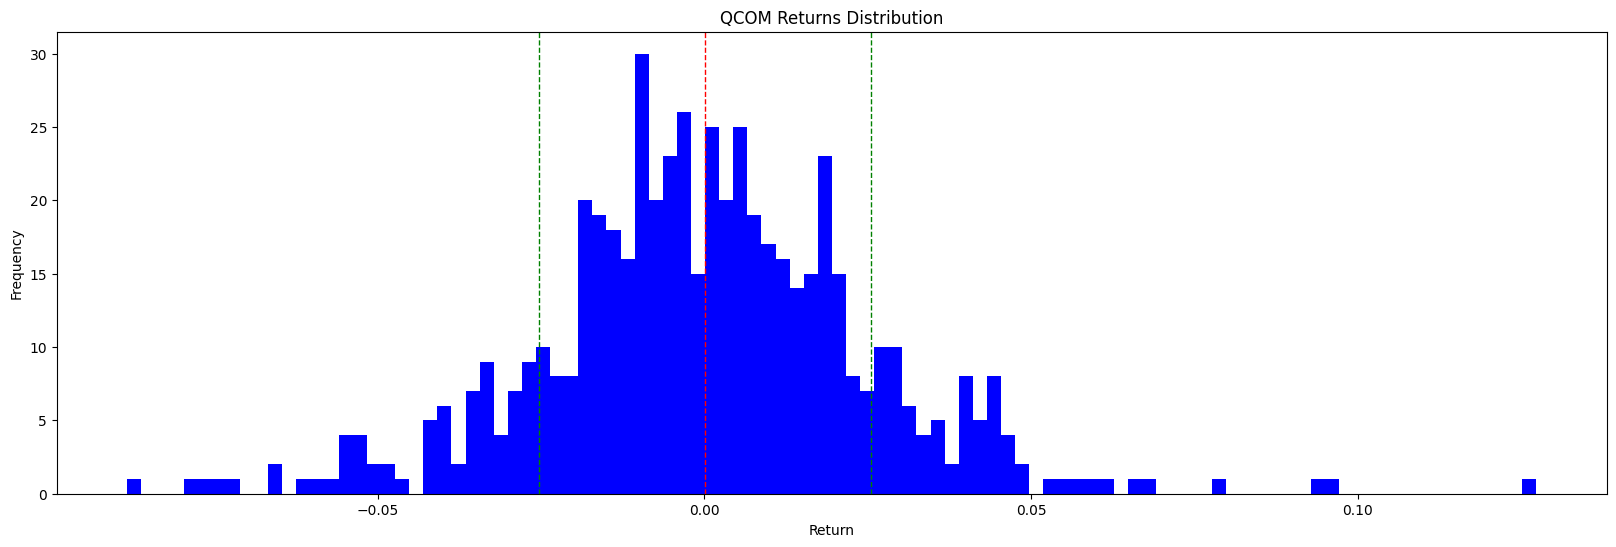

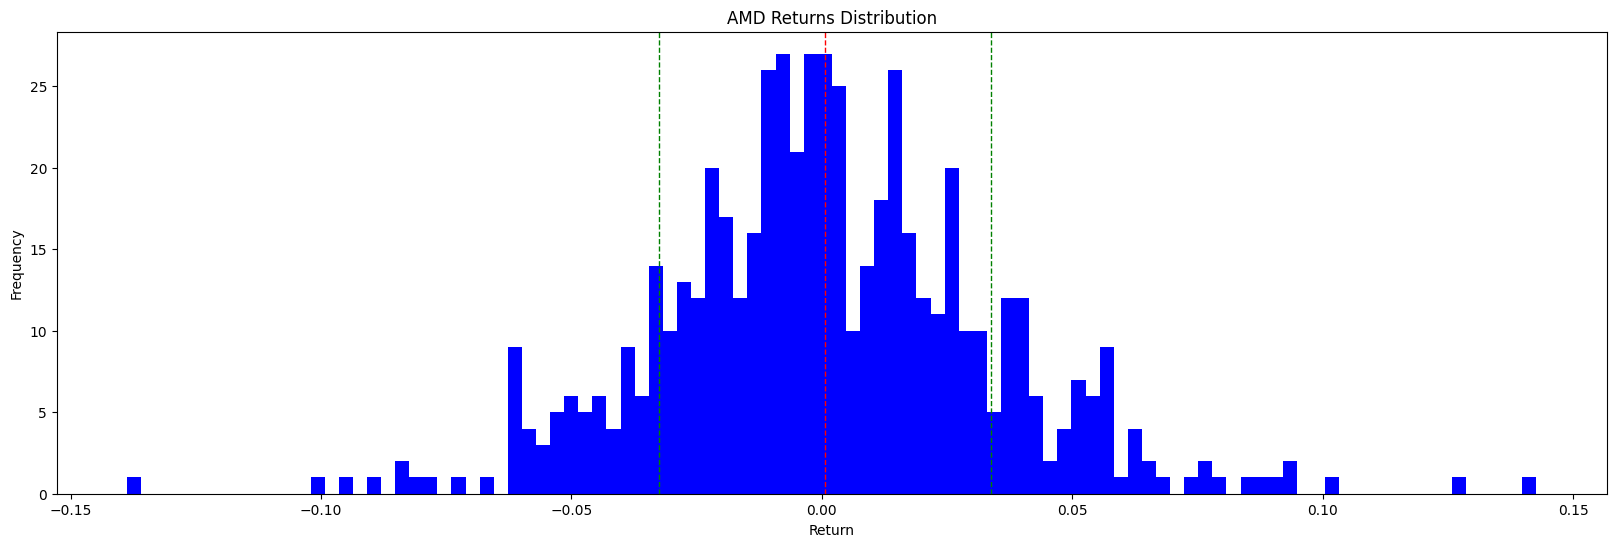

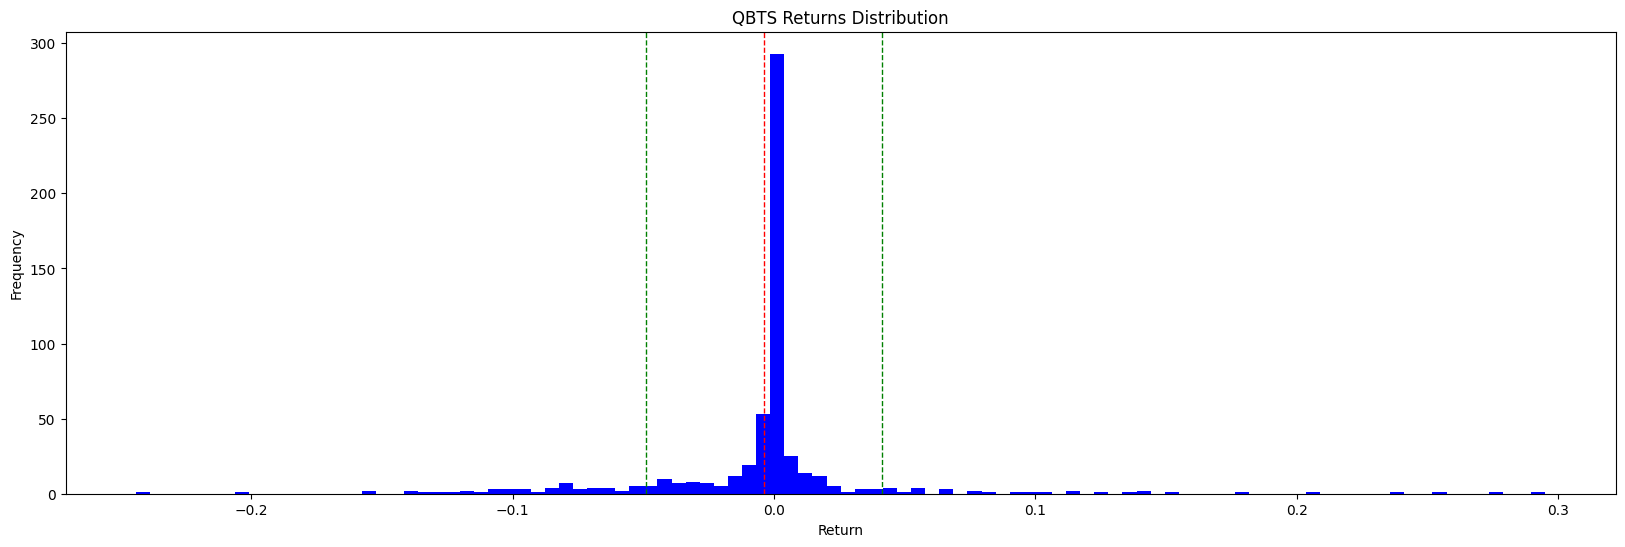

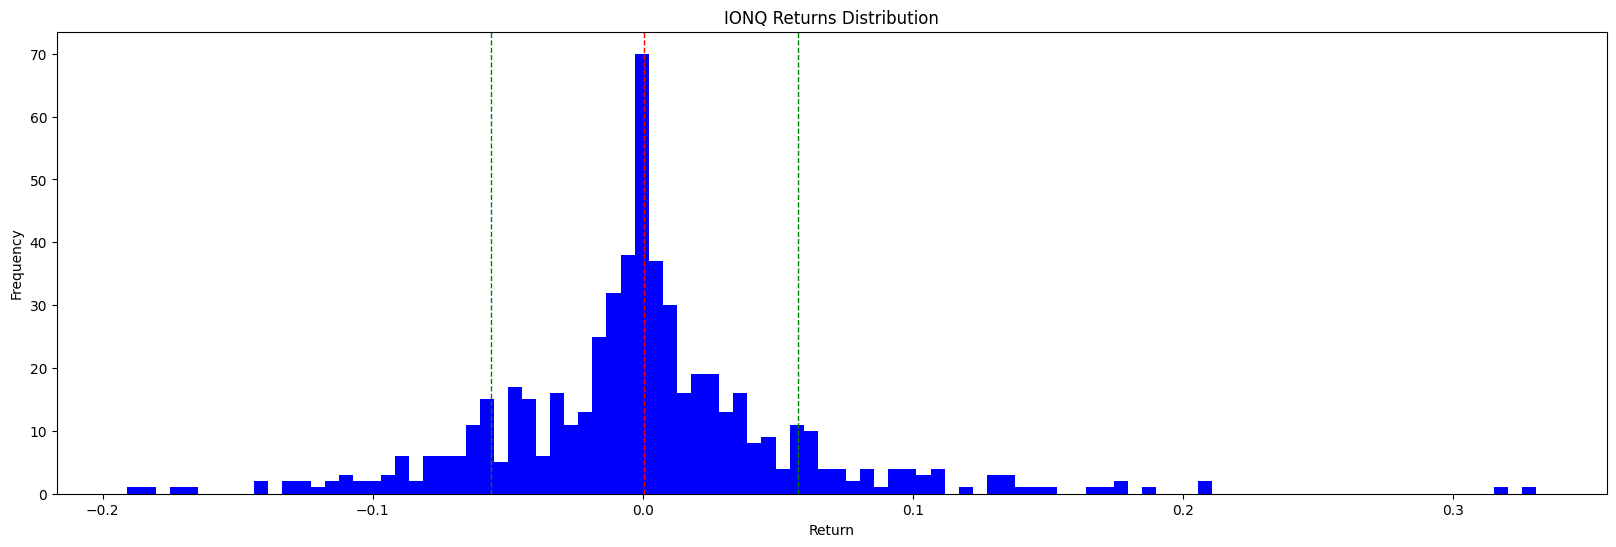

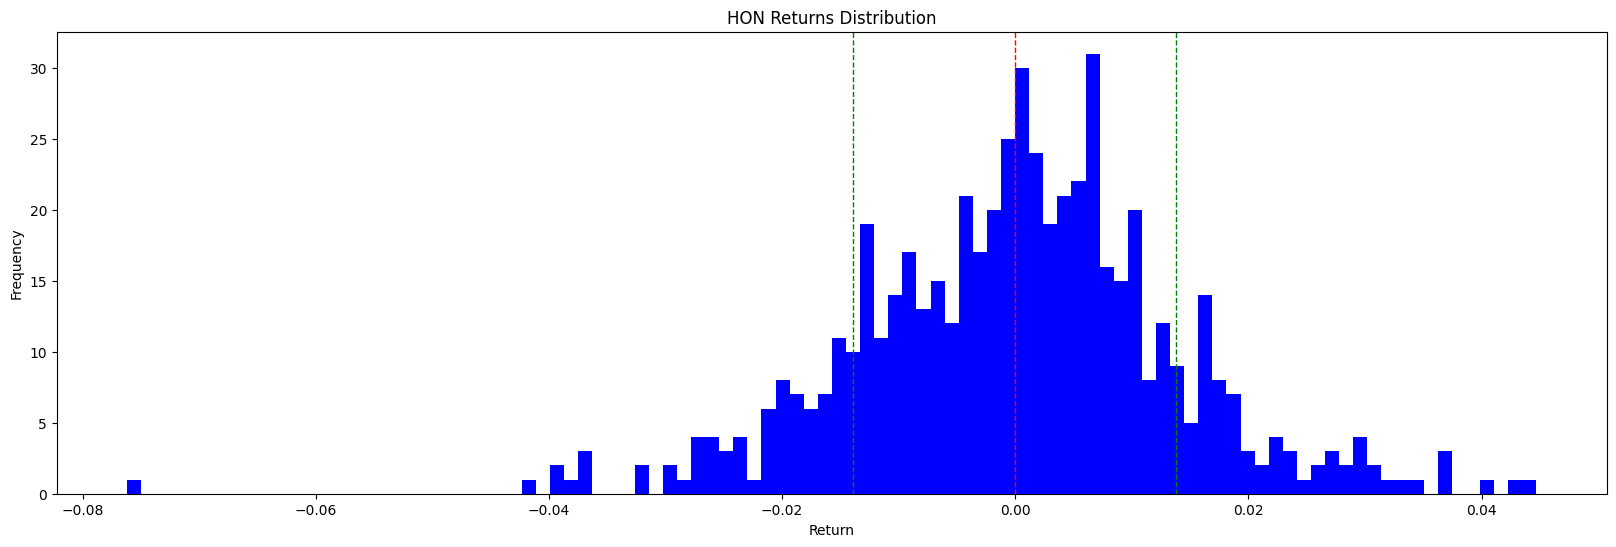

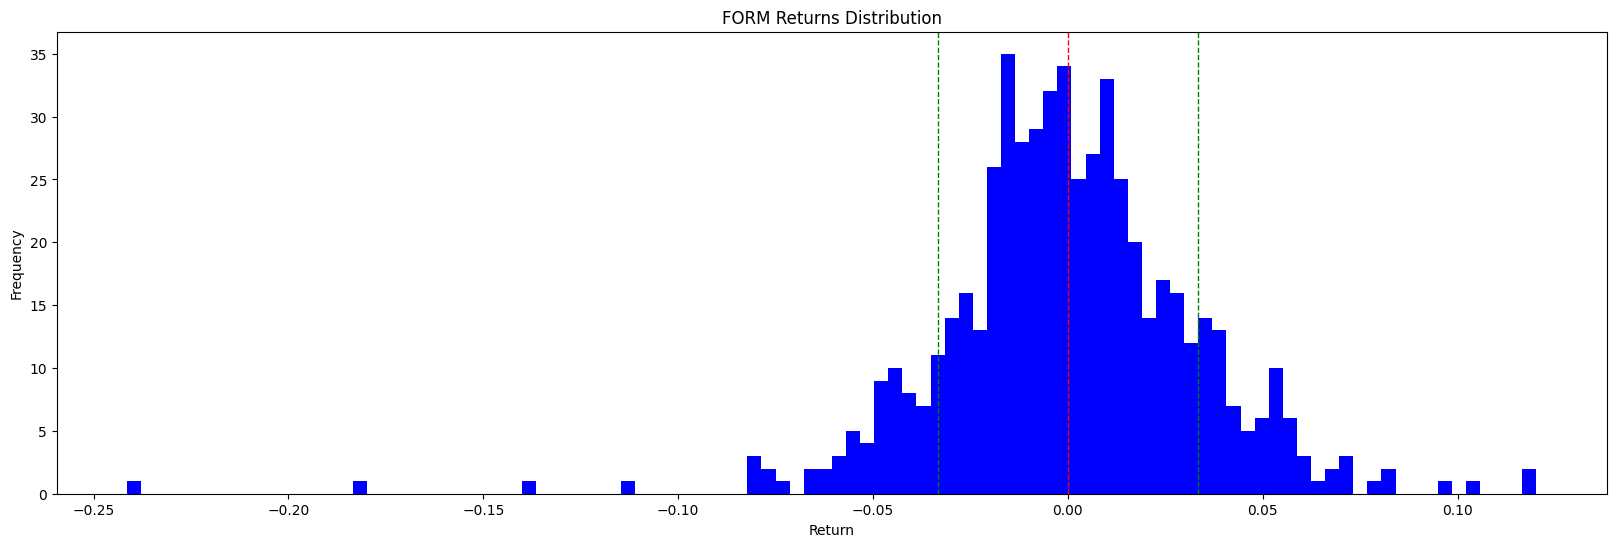

In [4]:
# plot distribution of returns
for stock in leaders_quantum_computing:
    f.plot_stock_returns_distribution(dict_stock_returns[stock], name = stock)

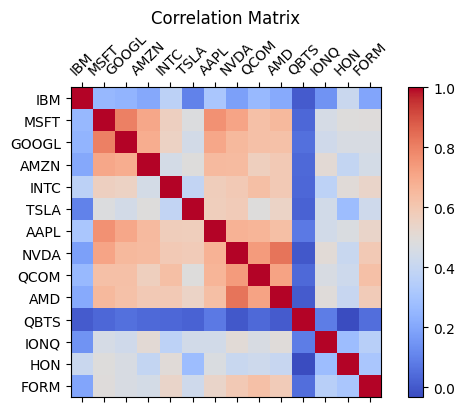

In [5]:
# 3. Compute the correlation matrix of the returns
correlation_matrix = f.compute_correlation_matrix(dict_stock_returns)
f.plot_correlation_matrix(correlation_matrix)

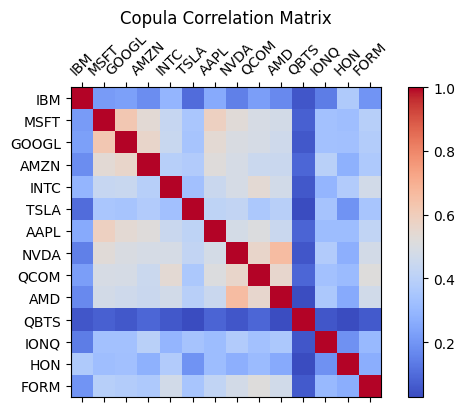

In [6]:
# 4. Compute the copula correlation matrix
copula_correlation_matrix = f.compute_copula_correlation_matrix(dict_stock_returns)
f.plot_correlation_matrix(copula_correlation_matrix, title='Copula Correlation Matrix')

## GARCH Process to predict volatility

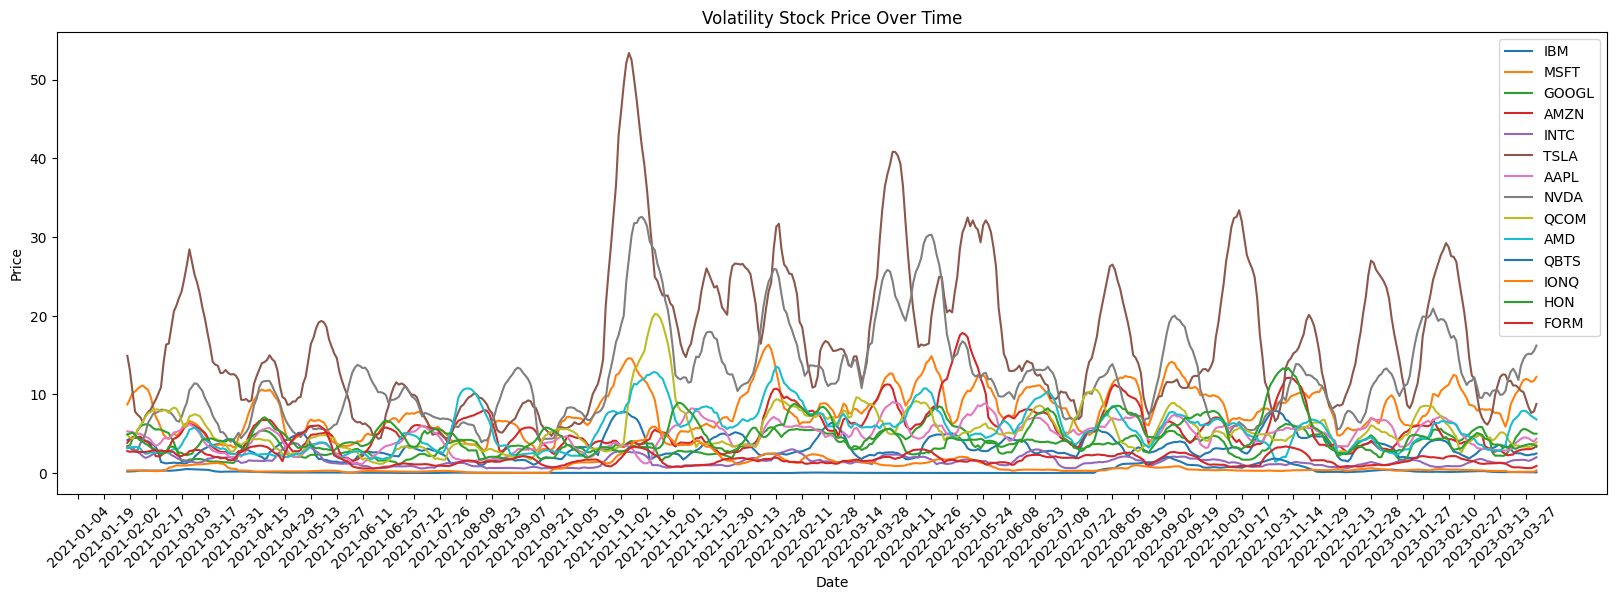

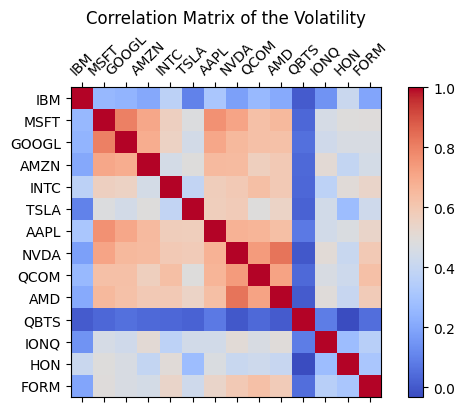

In [7]:
# GARCH Process to predict volatility

dict_stock_volatility = {}
for stock in leaders_quantum_computing:
    dict_stock_volatility[stock] = f.compute_stock_volatility(dict_stock_returns[stock])

# 2. Plot the volatility of the stocks
f.plot_multiple_stock_data(dict_stock_volatility, column='volatility')

# 3. Compute the correlation matrix of the volatility
correlation_matrix_volatility = f.compute_correlation_matrix(dict_stock_volatility)
f.plot_correlation_matrix(correlation_matrix_volatility, title='Correlation Matrix of the Volatility')


In [8]:
STOCK = 'IBM'

stock_data = dict_stock_volatility[STOCK].dropna()
stock_data.head()


,date,open,high,low,close,adj_close,volume,return,volatility
19,2021-02-01,114.627151,115.630974,113.508606,115.239006,98.688553,6538023,0.012006,4.182766
20,2021-02-02,114.110901,115.678780,114.034416,114.187378,97.787949,6633627,-0.009126,4.373870
21,2021-02-03,113.804970,114.531548,112.925430,113.881454,97.525963,7024308,-0.002679,4.566431
22,2021-02-04,114.636711,115.774376,113.642448,115.697899,99.081528,4771957,0.015950,4.535113
23,2021-02-05,115.678780,116.453156,115.219887,116.434036,99.711945,4775722,0.006363,4.459642


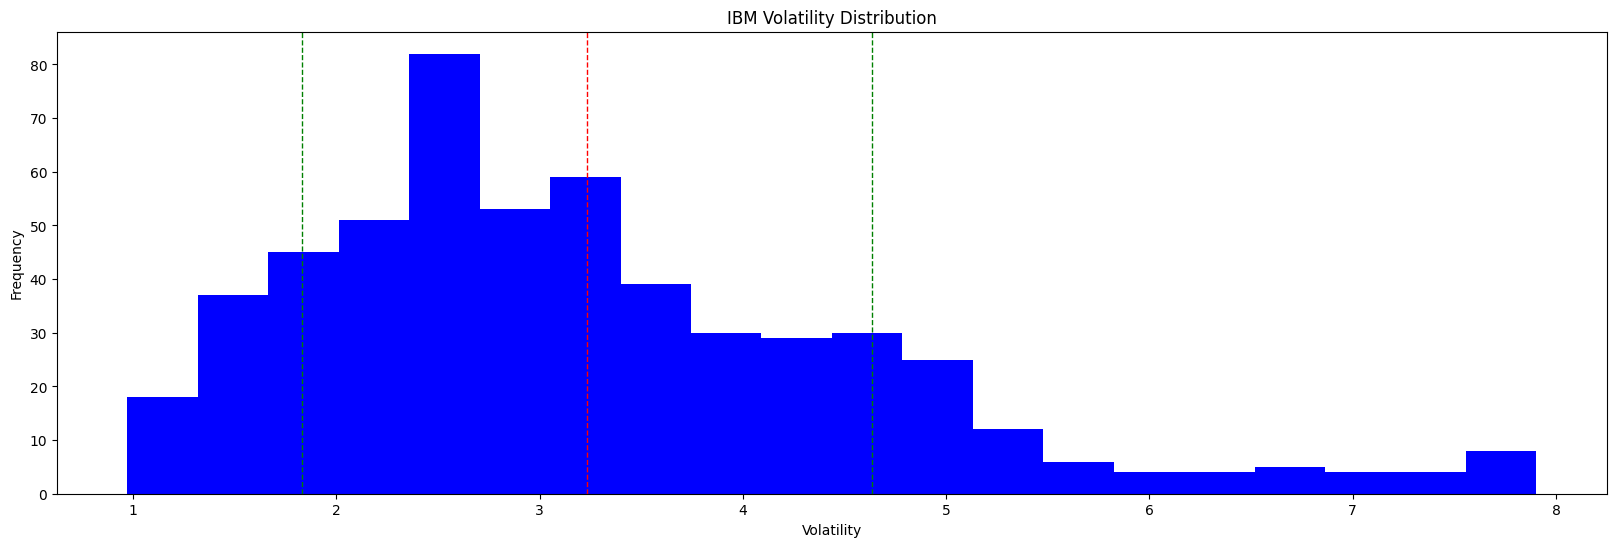

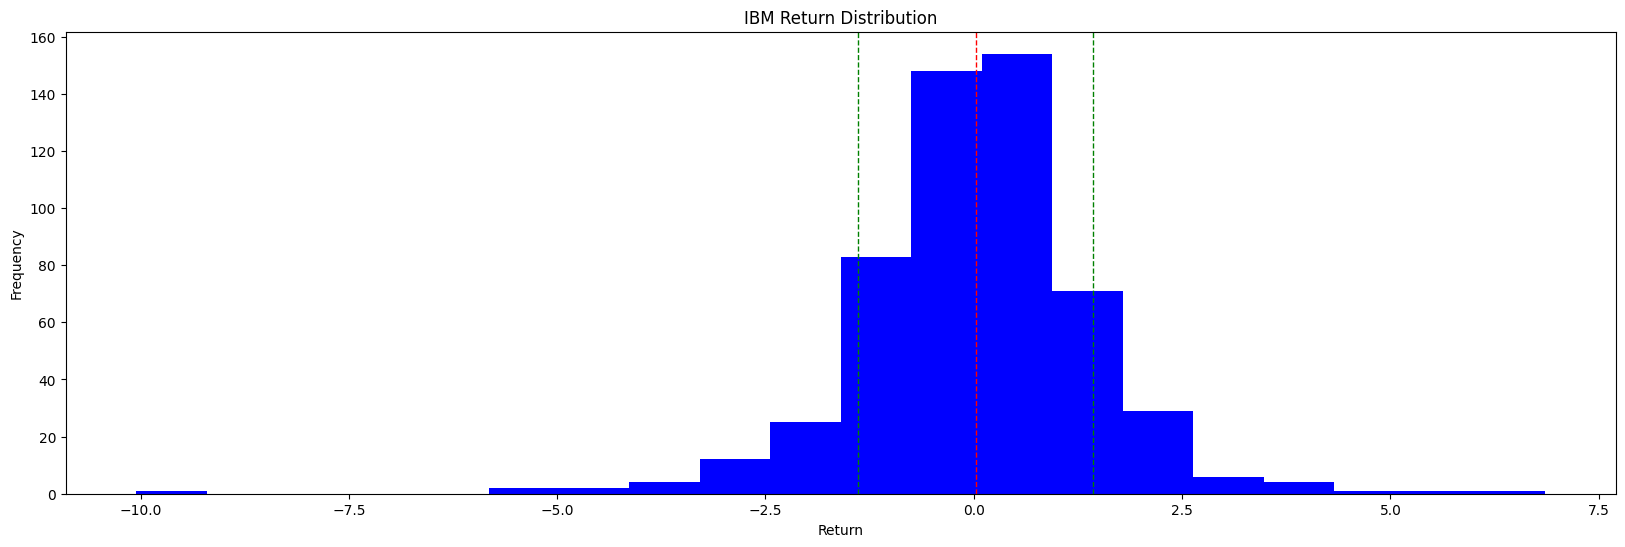

In [11]:
# plot the volatility of the stock bar chart
f.plot_stock_histogram(stock_data, "volatility", name=STOCK)
# Take the natural logarithm of the volatility data
# Convert prices to log returns 
stock_data['return'] = np.pad(np.diff(np.log(stock_data['close'])) * 100, (1, 0), 'constant', constant_values=np.nan)
# plot the log returns of the stock bar chart
f.plot_stock_histogram(stock_data, "return", name=STOCK)
stock_data = stock_data.dropna()

Iteration:      1,   Func. Count:     16,   Neg. LLF: 643.239226500509
Iteration:      2,   Func. Count:     34,   Neg. LLF: 4136875.401610447
Iteration:      3,   Func. Count:     51,   Neg. LLF: 594.9256781044892
Iteration:      4,   Func. Count:     67,   Neg. LLF: 597.5250329044197
Iteration:      5,   Func. Count:     83,   Neg. LLF: 599.5507221421606
Iteration:      6,   Func. Count:     99,   Neg. LLF: 593.8770612490135
Iteration:      7,   Func. Count:    115,   Neg. LLF: 595.2558206208284
Iteration:      8,   Func. Count:    131,   Neg. LLF: 591.7280426774489
Iteration:      9,   Func. Count:    146,   Neg. LLF: 592.4105860600073
Iteration:     10,   Func. Count:    162,   Neg. LLF: 591.2757246885941
Iteration:     11,   Func. Count:    177,   Neg. LLF: 591.1596134528133
Iteration:     12,   Func. Count:    192,   Neg. LLF: 591.1479150474861
Iteration:     13,   Func. Count:    207,   Neg. LLF: 591.1433080954855
Iteration:     14,   Func. Count:    222,   Neg. LLF: 591.1428407

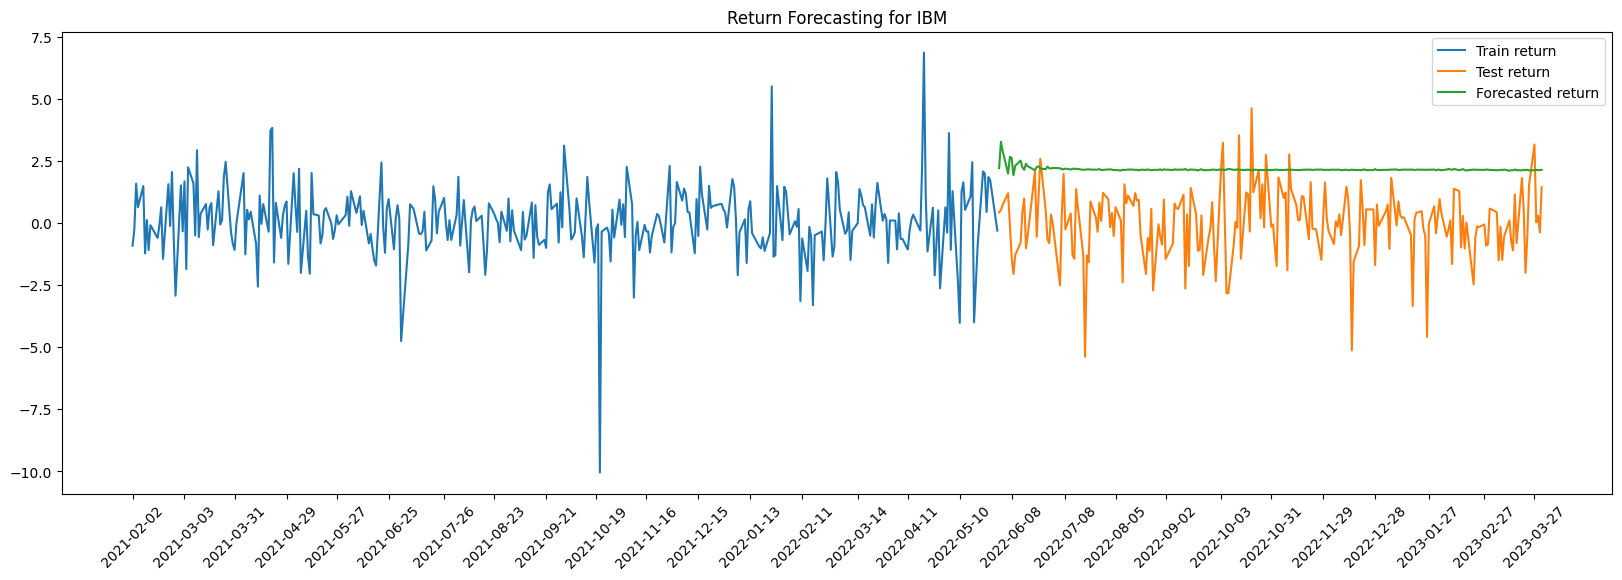

In [10]:
# make date column type datetime
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

import pandas as pd
stock_data['date'] = pd.to_datetime(stock_data['date'])
train_data = stock_data[stock_data['date'] < MID_DATE]
test_data = stock_data[stock_data['date'] >= MID_DATE]




# same for log volatility with student t distribution
model = arch_model(train_data["return"], vol='GARCH', p=7, q=5)
result = model.fit()
print(result.summary())

forecast = result.forecast(horizon=len(test_data), method='simulation')

plt.figure(figsize=(20, 6))
plt.plot(train_data['date'], train_data['return'], label='Train return')
plt.plot(test_data['date'], test_data['return'], label='Test return')
plt.plot(test_data['date'], forecast.variance.values[-1, :], label='Forecasted return')
plt.xticks(stock_data['date'][::20], rotation=45)
plt.title(f'Return Forecasting for {STOCK}')
plt.legend()
plt.show()


Iteration:      1,   Func. Count:      6,   Neg. LLF: 186.4462410197779
Iteration:      2,   Func. Count:     13,   Neg. LLF: 165.9865168055742
Iteration:      3,   Func. Count:     20,   Neg. LLF: 163.3596405882021
Iteration:      4,   Func. Count:     25,   Neg. LLF: 163.6646168936689
Iteration:      5,   Func. Count:     31,   Neg. LLF: 163.2902565165102
Iteration:      6,   Func. Count:     36,   Neg. LLF: 163.29005148956577
Iteration:      7,   Func. Count:     41,   Neg. LLF: 163.29005090113978
Optimization terminated successfully    (Exit mode 0)
            Current function value: 163.29005090113978
            Iterations: 7
            Function evaluations: 41
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 183.1385367307272
Iteration:      2,   Func. Count:     13,   Neg. LLF: 167.75084122158063
Iteration:      3,   Func. Count:     20,   Neg. LLF: 165.0759802193076
Iteration:      4,   Func. Count:     25,   Neg. LLF: 164.99268648263

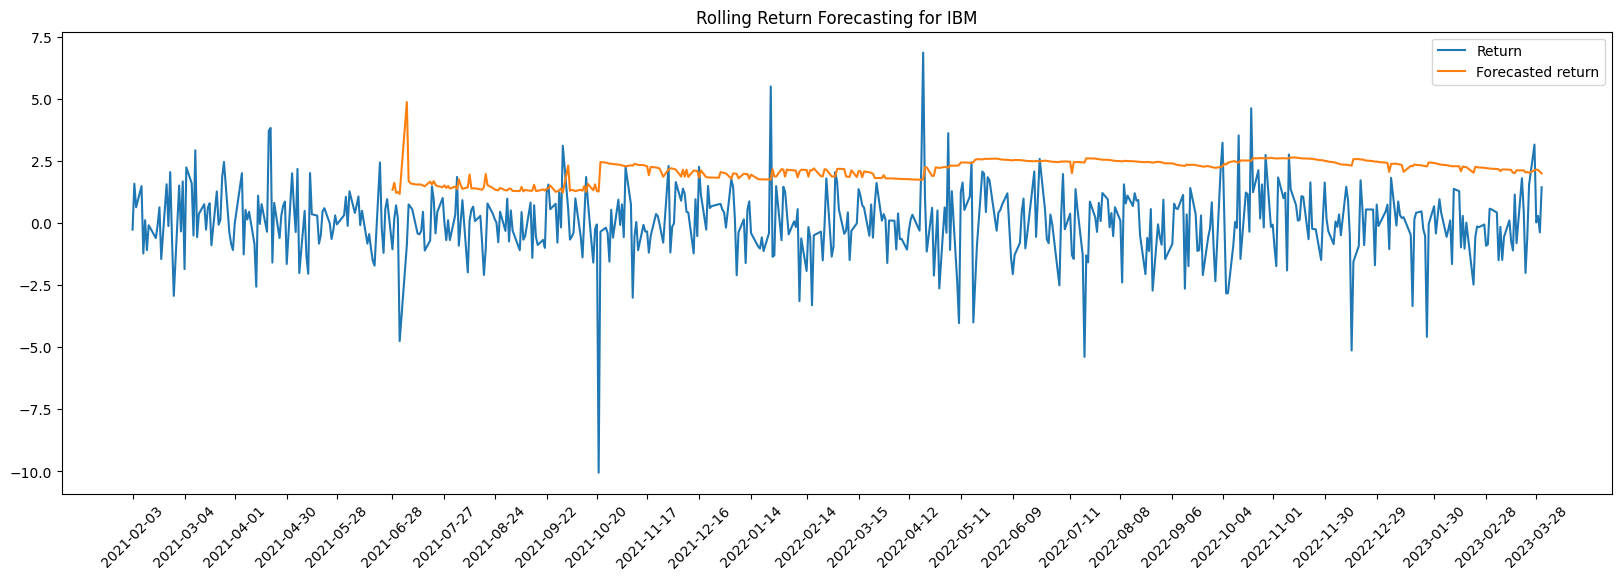

In [23]:
# 1 by 1 estimation for the return with a rolling window of 100 days
rolling_window = 100
rolling_forecast = []

for i in range(rolling_window, len(stock_data)):
    train_data = stock_data.iloc[:i]
    test_data = stock_data.iloc[i:i+1]
    model = arch_model(train_data["return"], vol='GARCH', p=1, q=1)
    result = model.fit()
    forecast = result.forecast(horizon=1, method='simulation')
    rolling_forecast.append(forecast.variance.values[-1, :][0])

plt.figure(figsize=(20, 6))
plt.plot(stock_data['date'], stock_data['return'], label='Return')
plt.plot(stock_data['date'][rolling_window:], rolling_forecast, label='Forecasted return')
plt.xticks(stock_data['date'][::20], rotation=45)
plt.title(f'Rolling  Volatility Forecasting for {STOCK}')
plt.legend()
plt.show()
